In [1]:
from misclassifications import plot_decision_regions
from misclassifications import standardize_X
from AdalineSGD import AdalineSGD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
"""Load data"""
dateset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = dateset.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = dateset.iloc[0:100, [0, 2]].values

In [3]:
X_std = standardize_X(X)

In [4]:
X_std[:10]

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952],
       [-0.11120129, -0.80621461],
       [-1.36417359, -1.01435952],
       [-0.73768744, -0.94497788],
       [-1.67741667, -1.01435952],
       [-0.89430898, -0.94497788]])

In [5]:
y[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [6]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)

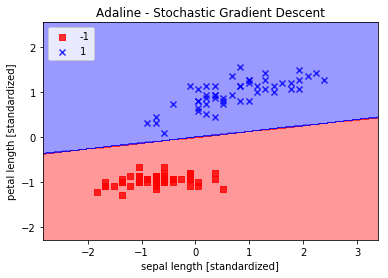

In [7]:
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

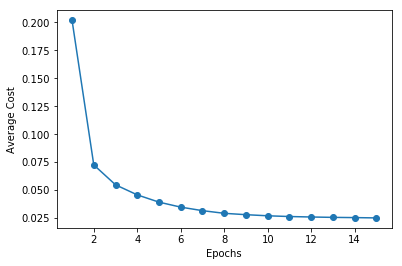

In [8]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()